In [58]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'bsu1JKwTrsKDrXq8JoZJ'
import math
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
df = quandl.get("WIKI/GOOGL")
print(df.head())
print(df.shape)
print(df.tail())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [43]:
df = df[['Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low']*100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [44]:
Forecast_col = 'Adj. Close'
df.fillna('-99999', inplace = True)
Forecast_out = int(math.ceil(0.01*len(df)))
df["label"] = df[Forecast_col].shift(-Forecast_out)
print(df.head())
print(Forecast_out)

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.078238
2004-08-20   54.322689  8.537313    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.966115    1.183658    9188600.0  71.219849
35


In [45]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-Forecast_out:]
X = X[:-Forecast_out] 

In [47]:
#X = X[:-Forecast_out+1]

In [48]:
#df.dropna(inplace=True)
df.dropna(inplace = True)
y = np.array(df['label'])
y = np.array(df['label']) 
print(len(X), len(y))

3389 3389


In [49]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [51]:
clf = LinearRegression(n_jobs = -1)
#clf = svm.SVR()
clf.fit(X_train, y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [52]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9794133238650037


In [53]:
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy,Forecast_out)

[1102.12171789 1074.3159177  1019.76502769 1059.73552953 1075.32214095
 1076.08231398 1093.75969409 1112.37958169 1117.56825317 1124.99715704
 1134.81032593 1131.7091147  1150.55259185 1166.97060435 1138.09162544
 1124.66904635 1088.95228203 1104.09948172 1115.91890943 1123.82830699
 1136.87295009 1152.53115141 1183.09357257 1188.652638   1159.00136243
 1171.61719287 1172.43134207 1155.40301959 1119.90744118 1116.81866745
 1115.49903074 1071.53074229 1043.95803547 1071.34968495 1020.07343904] 0.9794133238650037 35


In [59]:
df['Forecast'] =np.nan
last_date = df.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()
print(last_unix)
one_day = 86400
next_unix = last_unix + one_day
for  i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+= one_day
    df.loc[next_date] =[np.nan for _ in range(len(df.columns)-1)] + [i]
print(df.head())
print(df.tail())

2018-03-27 00:00:00
1522108800.0
              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.54

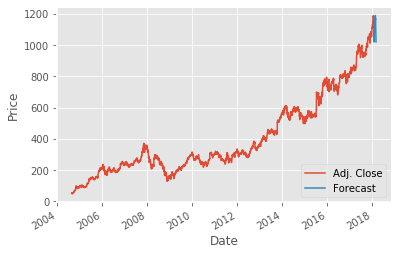

In [55]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()